# 1. Projeto GENAI: NLP Loja Magalu

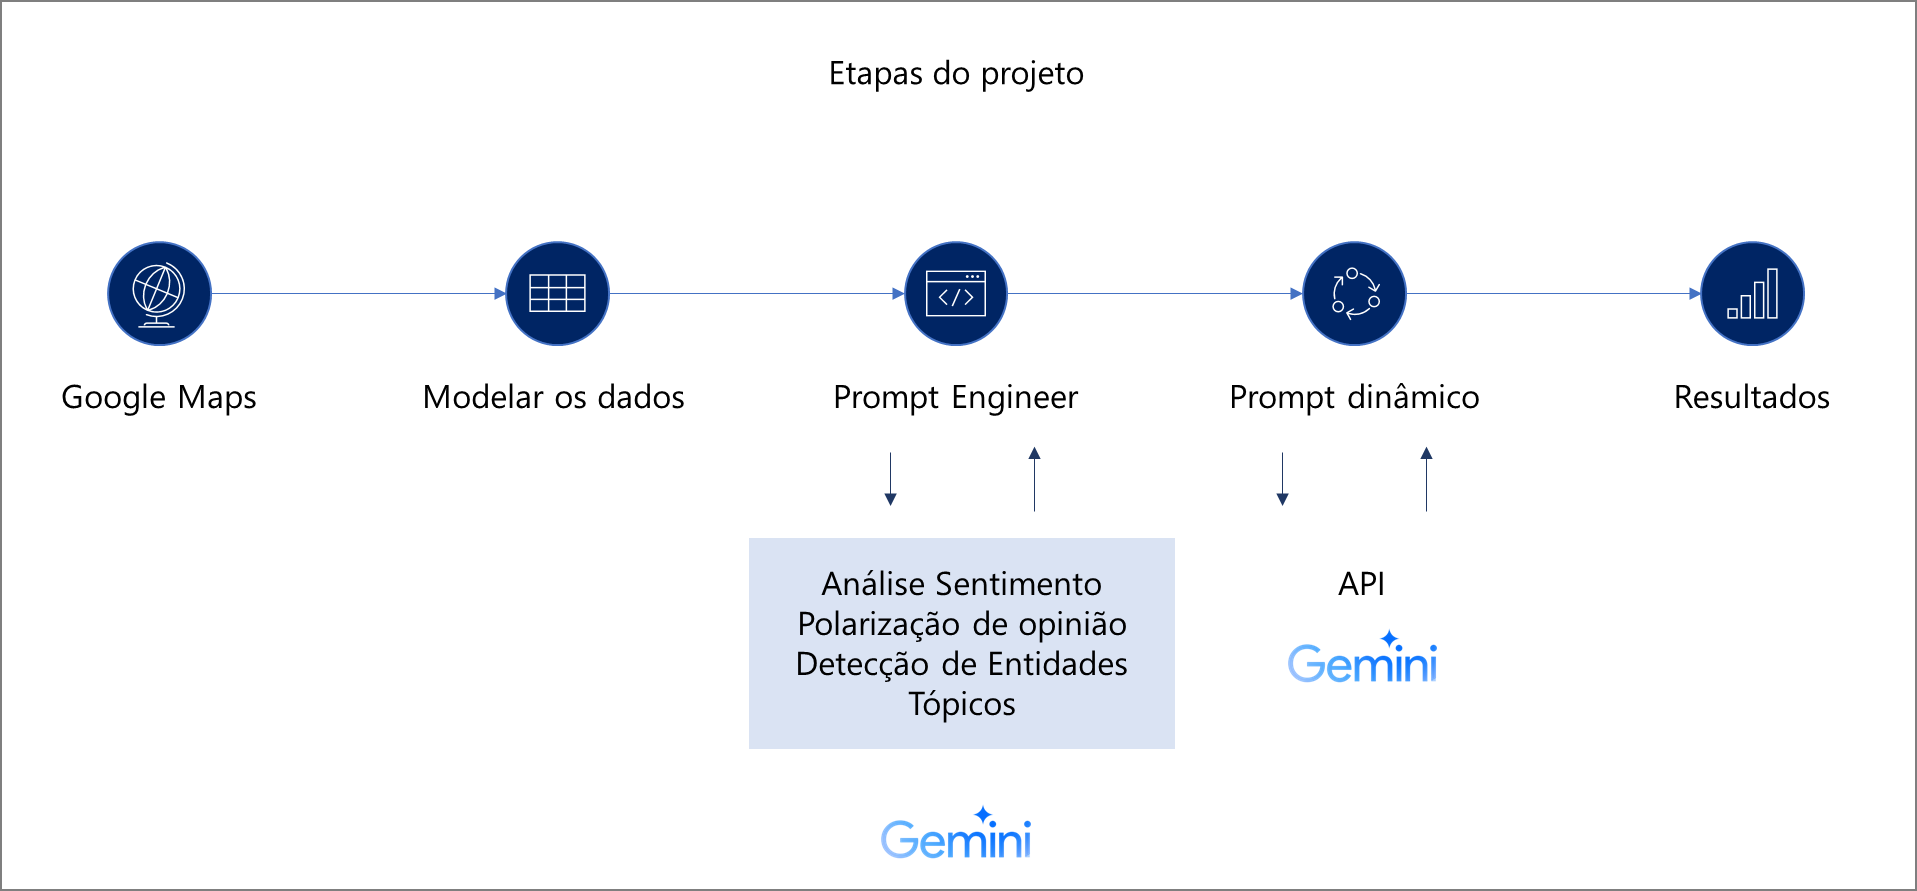

## 1.1 Objetivos
- Utlizar a arquitetura do GEMINI.
- Identificar o sentimento do cliente
- Encontrar Entidades citadas nos comentários
- Obter os Tópicos (áreas relacionadas)
- Encontrar Polarização de opinião

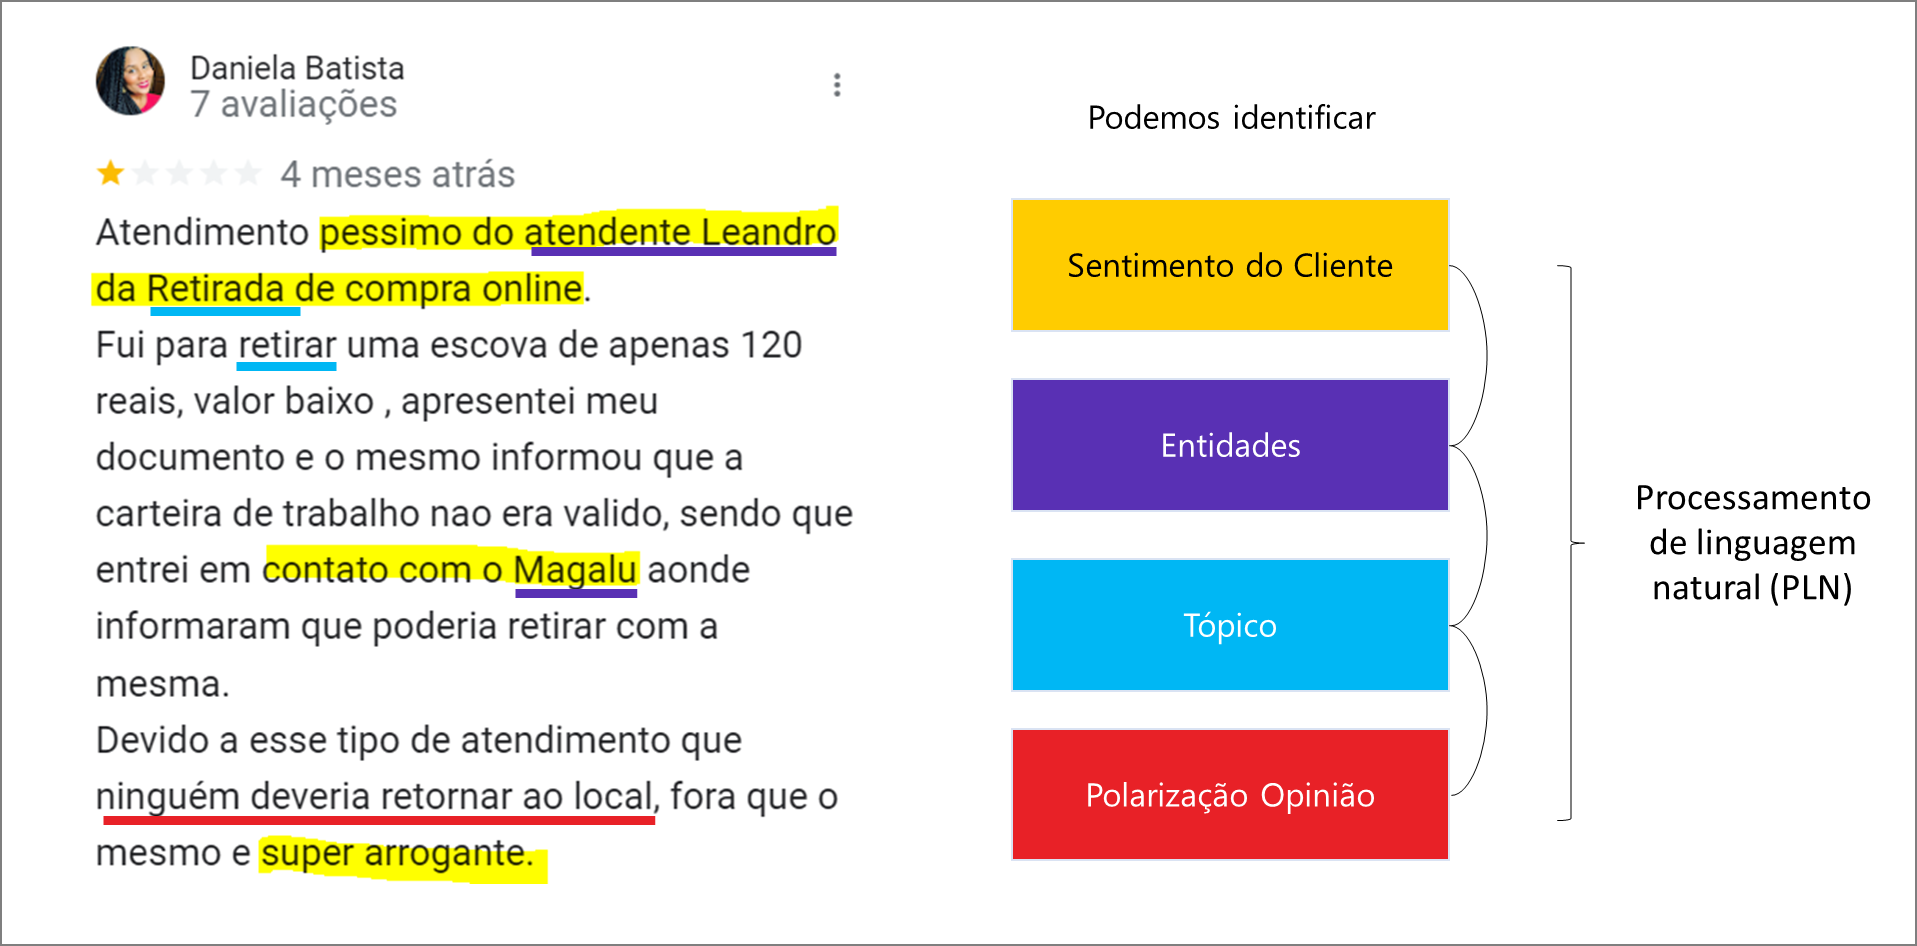

## 1.2 Obtenção dos Dados

Coleta dos dados do Gmaps, utlizamos a ferramenta: https://outscraper.com/pt/

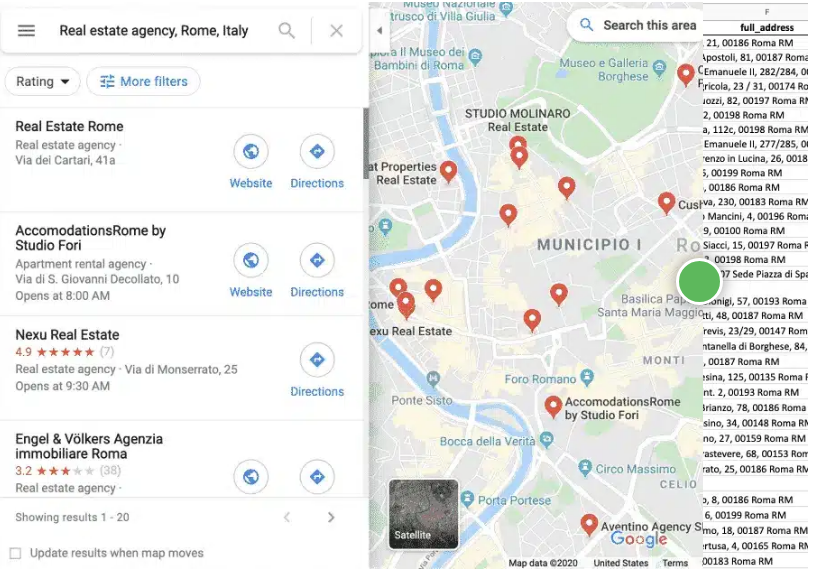

### 1.2.1 Bibliotecas

#### Instalar o pacote do GEMINI -> Python -> API
- google-generativeai
- pandas

In [2]:
# Frameworks
import pandas as pd 
import numpy as np
import datetime
import time
from dotenv import load_dotenv
import os

# Função do GEMINI
import google.generativeai as genai

load_dotenv()

True

#### 1.2.2 Configs

Chave de configuração da API do Gemini

Buscar em https://aistudio.google.com/app/apikey

In [3]:
# Chave configurado no Studio AI da Google
KEY_GEMINI = os.getenv('KEY_GEMINI')

# instanciar a aplicação do Gemini
genai.configure(api_key=KEY_GEMINI)

In [4]:
# Fitar o modelo
model = genai.GenerativeModel('gemini-pro')
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [ ]:
# Request GEMINI

prompt = '''

Qual a capital do Pernambuco? Quando ela foi fundada?

'''

# Give an answear
model.generate_content(prompt).text

'**Capital do Pernambuco:** Recife\n\n**Data de Fundação:** 12 de março de 1537'

## 2. Processamento de Linguagem Natural - NLP

### 2.1 Análise de Sentimento

A análise de sentimentos é uma técnica de processamento de linguagem natural (NLP), um ramo da Inteligência Artificial, que identifica e classifica automaticamente as emoções ou opiniões expressas em textos, desta forma ela é capaz de extrair e analisar informações a respeito da opinião, o sentido emocional e o sentimento geral determinando se são positivas, negativas, neutras ou outras categorias de sentimento, com base no contexto linguístico.


In [7]:
# Fixar prompt

prompt_fixo = '''

# Resposta do prompt
A saída do prompt precisa ser exatamente igual a esse exemplo, Resposta='Sua reposta aqui dentro'
A reposta precisa ser: ( Um Sentimento [não inclua a palavra sentimento na resposta]: Positivo, Negativo ou Neutro )

# Questão, seu papel
Qual o setinmento dessa frase?

Frase:
'''

# Var Frase
frase = 'Pela ssegunda vez não entregaram o meu produto.'

# Concatenar
prompt = f'{prompt_fixo}{frase}'

# Estrutura de print
print( f'Prompt enviado: {prompt}' )
print('\n')

# Gerando a resposta
print('Envio do promt:', datetime.datetime.now().time() )
print('-' * 50)

response = model.generate_content(prompt)
print(response.text)

print('-' * 50)
print('Retorno do promt:', datetime.datetime.now().time() )

Prompt enviado: 

# Resposta do prompt
A saída do prompt precisa ser exatamente igual a esse exemplo, Resposta='Sua reposta aqui dentro'
A reposta precisa ser: ( Um Sentimento [não inclua a palavra sentimento na resposta]: Positivo, Negativo ou Neutro )

# Questão, seu papel
Qual o setinmento dessa frase?

Frase:
Pela ssegunda vez não entregaram o meu produto.


Envio do promt: 08:17:30.780593
--------------------------------------------------
Resposta=Negativo
--------------------------------------------------
Retorno do promt: 08:17:32.489172


### 2.2 **Análise de Tópicos**

A análise de tópicos, também conhecida como modelagem de tópicos, é uma ferramenta do processamento de linguagem natural (PLN) que identifica automaticamente os principais temas ou assuntos presentes em um conjunto de textos, agrupando palavras ou frases relacionadas para revelar a estrutura latente de tópicos no conteúdo.


Ao contrário da análise de sentimento, que se concentra em extrair emoções e opiniões, a análise de tópicos se concentra em descobrir os temas subjacentes que conectam diferentes partes do texto.

In [8]:
# Fixar o prompt
prompt_fixo = '''

# Resposta do prompt
A saída do prompt precisa ser um dicionário em python, obecendo a seguinte ordem:
Resposta = { 'Tópico Identificado' : 'Sua resposta aqui dentro'  }

# Seu Papel
análise a frase e faça uma análise de tópicos.

Frase do cliente:
'''

# Frase
frase = 'Eu fiz um pedido no dia 01/12/2024 e o mesmo chegou no dia 08/12/2024, tive sérios problemas no call cente. Não consigo fazer uma simples devolução.'

# Concatenando o promt
prompt = f''' {prompt_fixo}{frase} '''

print( f'Prompt enviado: {prompt}' )
print('\n')

# Gerando a resposta
print('Envio do promt:', datetime.datetime.now().time() )
print('-' * 50)

response = model.generate_content(prompt)
print( response.text )

print('-' * 50)
print('Retorno do promt:', datetime.datetime.now().time() )

Prompt enviado:  

# Resposta do prompt
A saída do prompt precisa ser um dicionário em python, obecendo a seguinte ordem:
Resposta = { 'Tópico Identificado' : 'Sua resposta aqui dentro'  }

# Seu Papel
análise a frase e faça uma análise de tópicos.

Frase do cliente:
Eu fiz um pedido no dia 01/12/2024 e o mesmo chegou no dia 08/12/2024, tive sérios problemas no call cente. Não consigo fazer uma simples devolução. 


Envio do promt: 08:24:43.358944
--------------------------------------------------
Resposta = {
    'Pedido': 'Pedido realizado em 01/12/2024, entregue em 08/12/2024.',
    'Devolução': 'Dificuldade em realizar uma devolução.',
    'Atendimento ao Cliente': 'Problemas no call center.'
}
--------------------------------------------------
Retorno do promt: 08:24:45.820153


### 2.3 **Análise de polarização de opinião**

A polarização de opinião, também conhecida como polarização ideológica, é um fenômeno social no qual a sociedade se divide em dois grupos opostos com visões e valores distintos sobre um determinado tema.

Essa divisão pode ser política, social, cultural, religiosa ou de qualquer outra natureza.

In [9]:
# Fixar o prompt
prompt_fixo = '''

# Resposta do prompt
A saída do prompt precisa ser um dicionário em python, obecendo a seguinte ordem:
Resposta = { 'Há indicios de polarização' : ' [Tente identificar o tema: Política, Social, Cultural, Religiosa ou Ausente ] '  }

# Seu Papel
análise a frase e faça uma análise de polarização de opinião.

Frase do cliente:

'''
# Frase
frase = 'Todos os produtos desta loja dobraramd e valor, sem condições de comprar nada com a atual forma de aplicar juros nesse país.'

# Concatenando o promt
prompt = f''' {prompt_fixo}{frase} '''

print( f'Prompt enviado: {prompt}' )
print('\n')

# Gerando a resposta
print('Envio do promt:', datetime.datetime.now().time() )
print('-' * 50)

response = model.generate_content(prompt)
print( response.text )

print('-' * 50)
print('Retorno do promt:', datetime.datetime.now().time() )

Prompt enviado:  

# Resposta do prompt
A saída do prompt precisa ser um dicionário em python, obecendo a seguinte ordem:
Resposta = { 'Há indicios de polarização' : ' [Tente identificar o tema: Política, Social, Cultural, Religiosa ou Ausente ] '  }

# Seu Papel
análise a frase e faça uma análise de polarização de opinião.

Frase do cliente:

Todos os produtos desta loja dobraramd e valor, sem condições de comprar nada com a atual forma de aplicar juros nesse país. 


Envio do promt: 08:31:07.825729
--------------------------------------------------
Resposta = { 'Há indicios de polarização' : 'Social'  }
--------------------------------------------------
Retorno do promt: 08:31:09.661380


### 2.4 **Detecção de Entidades**

Na análise de dados, a Detecção de Entidades (DE), também conhecida como Reconhecimento de Entidades Nomeadas (REN), é uma técnica crucial do Processamento de Linguagem Natural (PLN) que visa identificar e classificar automaticamente entidades nomeadas em textos não estruturados.

Em outras palavras, a DE extrai informações relevantes como pessoas, lugares, organizações, datas, quantidades, produtos e outras categorias predefinidas a partir de documentos textuais, facilitando a compreensão e o processamento das informações.

In [10]:
# Fixar o prompt
prompt_fixo = '''

# Resposta do prompt
A saída do prompt precisa ser um dicionário em python, obecendo a seguinte ordem:
Resposta = { 'Houve alguma Entidade Detectada (sim ou não)' : '[Entidade detectada]'  }

# Seu Papel
análise a frase e faça uma análise de detecção de entidade

Frase do cliente:
'''

# Frase
frase = 'Fui até a loja e a vendedora foi muito simpatica!'

# Concatenando o promt
prompt = f''' {prompt_fixo}{frase} '''

print( f'Prompt enviado: {prompt}')
print('\n')

# Gerando a resposta
print('Envio do promt:', datetime.datetime.now().time() )
print('-' * 50)

response = model.generate_content(prompt)
print( response.text )

print('-' * 50)
print('Retorno do promt:', datetime.datetime.now().time() )

Prompt enviado:  

# Resposta do prompt
A saída do prompt precisa ser um dicionário em python, obecendo a seguinte ordem:
Resposta = { 'Houve alguma Entidade Detectada (sim ou não)' : '[Entidade detectada]'  }

# Seu Papel
análise a frase e faça uma análise de detecção de entidade

Frase do cliente:
Fui até a loja e a vendedora foi muito simpatica! 


Envio do promt: 08:34:19.687933
--------------------------------------------------
Resposta = { 'Houve alguma Entidade Detectada (sim ou não)' : 'sim',  'Entidade detectada' : 'loja'}
--------------------------------------------------
Retorno do promt: 08:34:20.957669


## 3. **Case: Magalu**

In [12]:
data = pd.read_excel('dados_magalu.xlsx')

data.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,0x94ce59ab2d603833:0xf80b40bc4decb497,Magazine Luiza,0x94ce59ab2d603833:0xf80b40bc4decb497,ChIJMzhgLatZzpQRl7TsTbxAC_g,https://www.google.com/maps/place/Magazine+Lui...,https://search.google.com/local/reviews?placei...,2820,4,ChdDSUhNMG9nS0VJQ0FnSUNMcVpIbXZnRRAB,CAESYENBRVFBUnBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMT...,...,4,1718923217,06/20/2024 22:40:17,0,-573293350054218601,254,137,390,614,1425
1,0x94ce59ab2d603833:0xf80b40bc4decb497,Magazine Luiza,0x94ce59ab2d603833:0xf80b40bc4decb497,ChIJMzhgLatZzpQRl7TsTbxAC_g,https://www.google.com/maps/place/Magazine+Lui...,https://search.google.com/local/reviews?placei...,2820,4,ChdDSUhNMG9nS0VJQ0FnSUNMeG91Ri13RRAB,CAESY0NBRVFBaHBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMT...,...,4,1718726760,06/18/2024 16:06:00,0,-573293350054218601,254,137,390,614,1425
2,0x94ce59ab2d603833:0xf80b40bc4decb497,Magazine Luiza,0x94ce59ab2d603833:0xf80b40bc4decb497,ChIJMzhgLatZzpQRl7TsTbxAC_g,https://www.google.com/maps/place/Magazine+Lui...,https://search.google.com/local/reviews?placei...,2820,4,ChZDSUhNMG9nS0VJQ0FnSUNMeW9pZWNREAE,CAESY0NBRVFBeHBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMT...,...,5,1718655202,06/17/2024 20:13:22,0,-573293350054218601,254,137,390,614,1425
3,0x94ce59ab2d603833:0xf80b40bc4decb497,Magazine Luiza,0x94ce59ab2d603833:0xf80b40bc4decb497,ChIJMzhgLatZzpQRl7TsTbxAC_g,https://www.google.com/maps/place/Magazine+Lui...,https://search.google.com/local/reviews?placei...,2820,4,ChdDSUhNMG9nS0VJQ0FnSUNMcU9mdnNBRRAB,CAESYENBRVFCQnBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMT...,...,5,1718376730,06/14/2024 14:52:10,0,-573293350054218601,254,137,390,614,1425
4,0x94ce59ab2d603833:0xf80b40bc4decb497,Magazine Luiza,0x94ce59ab2d603833:0xf80b40bc4decb497,ChIJMzhgLatZzpQRl7TsTbxAC_g,https://www.google.com/maps/place/Magazine+Lui...,https://search.google.com/local/reviews?placei...,2820,4,ChZDSUhNMG9nS0VJQ0FnSUR6aDRmcE5BEAE,CAESYENBRVFCUnBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMT...,...,1,1718229148,06/12/2024 21:52:28,0,-573293350054218601,254,137,390,614,1425


In [13]:
# informações
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   query                                200 non-null    object 
 1   name                                 200 non-null    object 
 2   google_id                            200 non-null    object 
 3   place_id                             200 non-null    object 
 4   location_link                        200 non-null    object 
 5   reviews_link                         200 non-null    object 
 6   reviews                              200 non-null    int64  
 7   rating                               200 non-null    int64  
 8   review_id                            200 non-null    object 
 9   review_pagination_id                 200 non-null    object 
 10  author_link                          200 non-null    object 
 11  author_title                    

In [14]:
data.review_text.head(10)

0                                                  NaN
1    Loja boa com uma boa variedade de produtos e o...
2    A vendedora Eduarda,super profissional, educad...
3                                                  NaN
4                                                  NaN
5    Bem atendido, bons itens, bons preços e facili...
6                          Otima loja bonita bom preço
7                                                  NaN
8                                   Tem boas promoções
9    Como fica em um calçadão, fica inviável para q...
Name: review_text, dtype: object

In [15]:
# Filtrando apenas comentários que há texto
data_comment = data[data.review_text.notnull()].review_text
data_comment

1      Loja boa com uma boa variedade de produtos e o...
2      A vendedora Eduarda,super profissional, educad...
5      Bem atendido, bons itens, bons preços e facili...
6                            Otima loja bonita bom preço
8                                     Tem boas promoções
                             ...                        
192    Um lugar razoável no preço mas regular na qual...
193    Péssimo atendimento eu entrei para fazer a com...
196                                                  Bom
198    Gostei da loja, variedade de produtos e serviç...
199    Para retirar encomendas tem uma lentidão no at...
Name: review_text, Length: 118, dtype: object

In [16]:
data_comment.head(1).values

array(['Loja boa com uma boa variedade de produtos e o preço está na medida do mercado.'],
      dtype=object)

### 3.1 **Engenharia de Prompt**
1. Solicitação de conhecimento gerado
2. Encadeamento de prompts

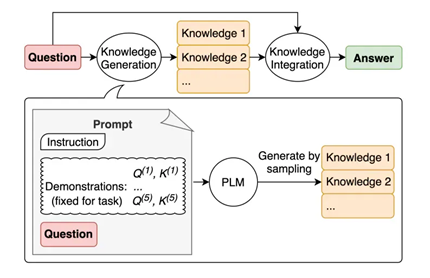

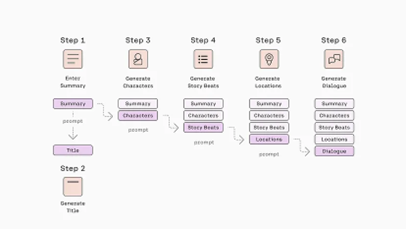

**Prompt**

1. Definição do Papel -> Analista
2. Objetivo Específico -> análise detalhada
3. Instruções Específicas -> diferentes tipos de análises
4. Componentes Específicos -> Retornar um dicionário
5. Múltiplas Etapas -> Diversas análises

In [17]:
dictionary = {
    'Sentimento ' : 'Positivo',
    'Topico' : 'Atendimento',
    'Opiniao' : 'Não houve',
    'Entidade' : 'Atendimento'
}

pd.DataFrame(dictionary, index=[0])

,Sentimento,Topico,Opiniao,Entidade
0,Positivo,Atendimento,Não houve,Atendimento


In [18]:
# Eng de prompt

# Fixar o prompt
prompt_fixo = '''

# Função
Você é um analista resposável por analisar os comentários dos clientes em uma grande loja do varejo brasileiro

# Resposta do prompt
A saída do prompt precisa ser exatamente igual a esse exemplo um dicionario em Python:
{ 'Análise de Sentimento': '', 'Detecção de Entidades': '', 'Análise de Tópicos': '', 'Análise de Polaridade de Opinião': '' },

As respostas devem seguir o seguinte formato:
- Para Análise de Sentimento: (Positivo, Negativo ou Neutro)
- Para Detecção de Entidades: (Entidade nomeada detectada na frase)
- Para Análise de Tópicos: (Principal topico)
- Para Análise de Polaridade de Opinião: (política, social, cultural, religiosa ou de qualquer outra natureza.)

Observações:
- A resposta no dicionário deve contem apenas chave e 1 valor.

Exemplo de reposta ideal:
{
 'Análise de Sentimento': 'Neutro',
 'Detecção de Entidades': 'Estabelecimento',
 'Análise de Tópicos': 'Reclamação',
 'Análise de Polaridade de Opinião': 'Politica'
}

Analise a Frase e preencha o dicionário?
Frase:
'''

# Frase
frase = 'fui mal atendimento pelo sr. João! Não voltem nessa loja em hipotese alguma!'

# Concatenando o promt
prompt = f''' {prompt_fixo}{frase} '''

# Gerando a resposta
response = model.generate_content(prompt)
print(response.text)

{
 'Análise de Sentimento': 'Negativo',
 'Detecção de Entidades': 'Estabelecimento',
 'Análise de Tópicos': 'Reclamação',
 'Análise de Polaridade de Opinião': 'Social'
}


In [19]:
data_comment.head(5)

1    Loja boa com uma boa variedade de produtos e o...
2    A vendedora Eduarda,super profissional, educad...
5    Bem atendido, bons itens, bons preços e facili...
6                          Otima loja bonita bom preço
8                                   Tem boas promoções
Name: review_text, dtype: object

In [20]:
data_comment.shape

(118,)

In [21]:
# Loop para processar toda a base de comentarios

accum = pd.DataFrame()


for Loop, Comentario in enumerate( data_comment[0:118] ):

  time.sleep(2)

  print( Loop )

  print('Envio do promt:', datetime.datetime.now().time() )

  prompt = f''' {prompt_fixo}{Comentario} '''

  try:

    response = model.generate_content(prompt)
    tabela = pd.DataFrame( eval(response.text ), index=[0])
    tabela['comentario'] = Comentario
    tabela['loop'] = Loop

    accum = pd.concat([accum, tabela])

  except:
    print(f'#### Erro de loop: {Loop} ####')

  # print da hora que finalizou
  print('Retorno IA:', datetime.datetime.now().time())

0
Envio do promt: 08:49:33.503203
Retorno IA: 08:49:35.951411
1
Envio do promt: 08:49:37.953791
Retorno IA: 08:49:39.461230
2
Envio do promt: 08:49:41.463584
Retorno IA: 08:49:42.995792
3
Envio do promt: 08:49:44.998074
Retorno IA: 08:49:46.505264
4
Envio do promt: 08:49:48.507932
Retorno IA: 08:49:50.022884
5
Envio do promt: 08:49:52.025414
Retorno IA: 08:49:53.531839
6
Envio do promt: 08:49:55.534395
Retorno IA: 08:49:57.053614
7
Envio do promt: 08:49:59.056183
Retorno IA: 08:50:00.743538
8
Envio do promt: 08:50:02.746014
Retorno IA: 08:50:04.306533
9
Envio do promt: 08:50:06.309154
Retorno IA: 08:50:07.912643
10
Envio do promt: 08:50:09.915122
Retorno IA: 08:50:11.487087
11
Envio do promt: 08:50:13.489705
Retorno IA: 08:50:15.018244
12
Envio do promt: 08:50:17.020861
Retorno IA: 08:50:18.037537
13
Envio do promt: 08:50:20.040049
Retorno IA: 08:50:21.869115
14
Envio do promt: 08:50:23.871706
Retorno IA: 08:50:25.379505
15
Envio do promt: 08:50:27.381997
Retorno IA: 08:50:28.870576
16

In [22]:
accum

,Análise de Sentimento,Detecção de Entidades,Análise de Tópicos,Análise de Polaridade de Opinião,comentario,loop
0,Positivo,Loja,Avaliação de produtos e preços,Nenhuma,Loja boa com uma boa variedade de produtos e o...,0
0,Positivo,Magazine Luiza,Elogio,Neutra,"A vendedora Eduarda,super profissional, educad...",1
0,Positivo,Itens,Satisfação,Produto,"Bem atendido, bons itens, bons preços e facili...",2
0,Positivo,Loja,Qualidade,Cultural,Otima loja bonita bom preço,3
0,Positivo,Promoções,Promoções,Social,Tem boas promoções,4
...,...,...,...,...,...,...
0,Neutro,Loja,Produto,Nenhuma,Um lugar razoável no preço mas regular na qual...,113
0,Negativo,Magazine Luiza,Reclamação,Politica,Péssimo atendimento eu entrei para fazer a com...,114
0,Positivo,Não detectado,Não detectado,Não detectado,Bom,115
0,Positivo,Loja,Experiência de Compra,Neutro,"Gostei da loja, variedade de produtos e serviç...",116


In [23]:
accum['Análise de Sentimento'].value_counts( normalize=True ) * 100

Análise de Sentimento
Positivo    62.162162
Negativo    32.432432
Neutro       4.504505
Misto        0.900901
Name: proportion, dtype: float64

In [24]:
accum['Detecção de Entidades'].value_counts( normalize=True ) * 100

Detecção de Entidades
Loja                                                            22.680412
Estabelecimento                                                 16.494845
Atendimento                                                      8.247423
                                                                 6.185567
Magazine Luiza                                                   4.123711
Produto                                                          4.123711
N/A                                                              3.092784
Vendedor                                                         3.092784
Eletrodomésticos                                                 2.061856
None                                                             2.061856
Nenhuma                                                          2.061856
Itens                                                            1.030928
Promoções                                                        1.030928
Atendente       

In [25]:
accum['Análise de Tópicos'].value_counts( normalize=True ) * 100

Análise de Tópicos
Reclamação                                           19.791667
Atendimento                                          10.416667
Atendimento ao Cliente                                5.208333
Atendimento ao cliente                                5.208333
                                                      5.208333
Experiência de Compra                                 4.166667
Satisfação                                            4.166667
Recomendação                                          3.125000
Experiência do Cliente                                2.083333
None                                                  2.083333
Elogio                                                2.083333
Logística                                             1.041667
Qualidade                                             1.041667
Promoções                                             1.041667
Sugestão                                              1.041667
Desordem, Dificuldade de acesso     

In [26]:
accum['Análise de Polaridade de Opinião'].value_counts( normalize=True ) * 100

Análise de Polaridade de Opinião
Social                                    21.875000
Neutra                                    20.833333
Neutro                                    15.625000
Nenhuma                                    9.375000
                                           9.375000
Politica                                   5.208333
Produto                                    2.083333
N/A                                        2.083333
Qualidade                                  2.083333
Cultural                                   2.083333
None                                       2.083333
Não se aplica                              1.041667
Política empresarial                       1.041667
Negativa                                   1.041667
Política                                   1.041667
Atendimento                                1.041667
Não há polaridade de opinião na frase.     1.041667
Não detectado                              1.041667
Name: proportion, dtype: float6